In [41]:
## Plot and compare various activation functions in three groups
#### traditional: signum, sigmoid, improved sigmoid, tanh
#### current: ReLU, Leaky ReLU
#### modern: swish, GELU

import numpy as np
import matplotlib.pyplot as plt

In [37]:
# thresholding function; discontinuous at x=0
def signum(x):
    return np.sign(x)

def d_signum(x):
    # derivative undefined at 0; set to 0 for visualization
    return np.zeros_like(x)

# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

# Improved sigmoid (LeCun-style scaled tanh)
def improved_sigmoid(x):
    return 1.7159 * np.tanh((1/3) * x)

def d_improved_sigmoid(x):
    return 1.7159 * (1/3) * (1 - np.tanh((1/3) * x)**2)

# Hypertangent: tanh(x) = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
def tanh(x):
    return np.tanh(x)
    
def d_tanh(x):
    return 1 - np.tanh(x)**2

# ReLU
def relu(x):
    return np.maximum(0, x)

def d_relu(x):
    return np.where(x > 0, 1, 0)

# Leaky ReLU
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def d_leaky_relu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# swish
def swish(x):
    return x * sigmoid(x)

def d_swish(x):
    s = sigmoid(x)
    return s + x * s * (1 - s)

# Approximate GELU (tanh version)
def gelu(x):
    return 0.5 * x * (1 + np.tanh(
        np.sqrt(2/np.pi) * (x + 0.044715 * x**3)
    ))

def d_gelu(x):
    tanh_term = np.tanh(
        np.sqrt(2/np.pi) * (x + 0.044715 * x**3)
    )
    sech2 = 1 - tanh_term**2
    term1 = 0.5 * (1 + tanh_term)
    term2 = 0.5 * x * sech2 * np.sqrt(2/np.pi) * (1 + 3 * 0.044715 * x**2)
    return term1 + term2

In [38]:
# -----------------------------
# Input range
# -----------------------------
x = np.linspace(-6, 6, 1000)

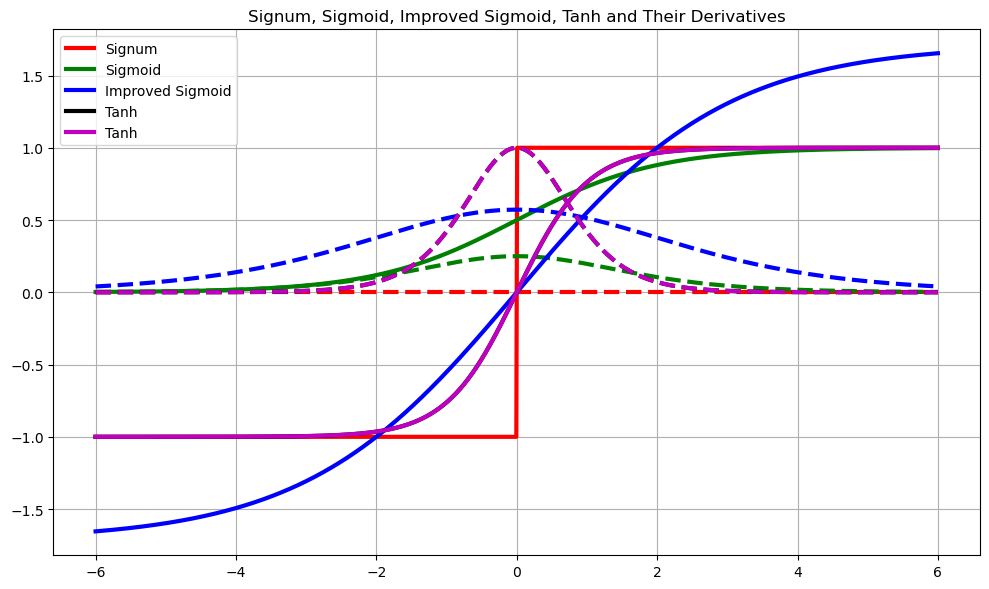

In [39]:
# ==========================================================
# Plot 1: Signum, Sigmoid, Improved Sigmoid, Tanh + Derivs
# ==========================================================
plt.figure(figsize=(10, 6))

plt.plot(x, signum(x), linewidth=3, color='r', label="Signum")
plt.plot(x, d_signum(x), linestyle='--', color='r', linewidth=3)

plt.plot(x, sigmoid(x), linewidth=3, color='g', label="Sigmoid")
plt.plot(x, d_sigmoid(x), linestyle='--', color='g', linewidth=3)

plt.plot(x, improved_sigmoid(x), linewidth=3, color='b', label="Improved Sigmoid")
plt.plot(x, d_improved_sigmoid(x), linestyle='--', color='b', linewidth=3)

plt.plot(x, tanh(x), linewidth=3, color='k', label="Tanh")
plt.plot(x, d_tanh(x), linestyle='--', color='k', linewidth=3)

plt.plot(x, tanh2(x), linewidth=3, color='m', label="Tanh")
plt.plot(x, d_tanh2(x), linestyle='--', color='m', linewidth=3)

plt.title("Signum, Sigmoid, Improved Sigmoid, Tanh and Their Derivatives")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

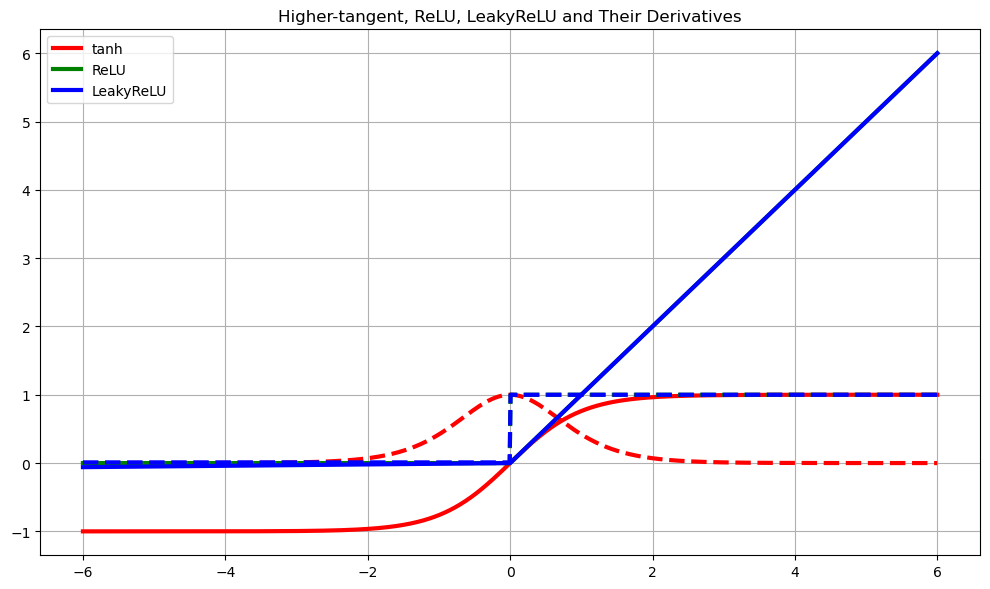

In [27]:
# ==========================================================
# Plot 2: Sigmoid, ReLU, LeakyReLU + Derivs
# ==========================================================
plt.figure(figsize=(10, 6))

plt.plot(x, tanh(x), linewidth=3, color="r", label="tanh")
plt.plot(x, d_tanh(x), linestyle='--', linewidth=3, color="r")

plt.plot(x, relu(x), linewidth=3, color="g", label="ReLU")
plt.plot(x, d_relu(x), linestyle='--', linewidth=3, color="g")

plt.plot(x, leaky_relu(x), linewidth=3, color="b", label="LeakyReLU")
plt.plot(x, d_leaky_relu(x), linestyle='--', linewidth=3, color="b")

plt.title("Higher-tangent, ReLU, LeakyReLU and Their Derivatives")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


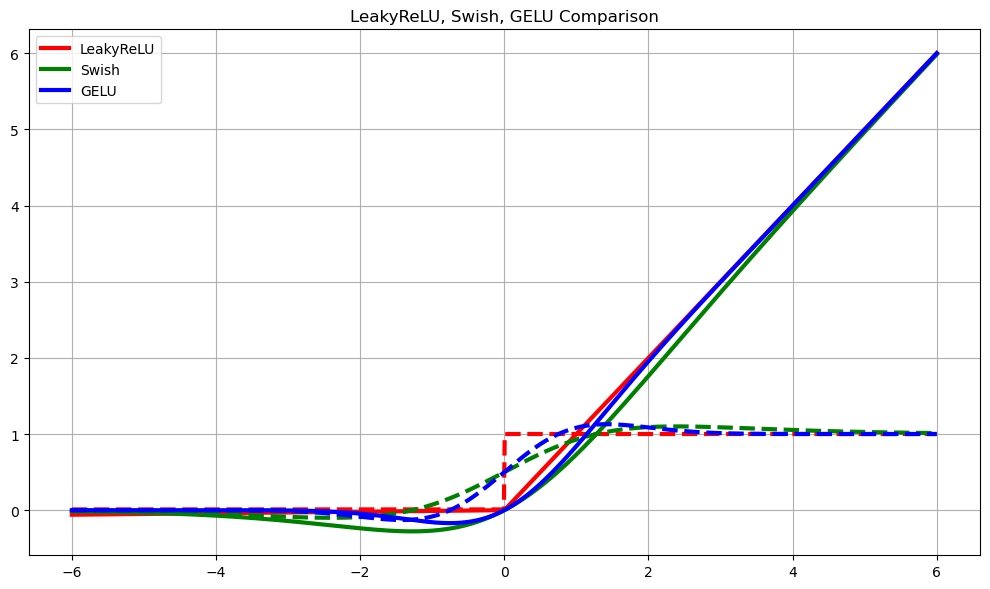

In [40]:
# ==========================================================
# Plot 3: LeakyReLU, Swish, GELU
# ==========================================================
plt.figure(figsize=(10, 6))

plt.plot(x, leaky_relu(x), linewidth=3, color="r", label="LeakyReLU")
plt.plot(x, d_leaky_relu(x), linestyle="--", linewidth=3, color="r")

plt.plot(x, swish(x), linewidth=3,  color="g", label="Swish")
plt.plot(x, d_swish(x), linestyle="--", linewidth=3,  color="g")

plt.plot(x, gelu(x), linewidth=3,  color="b", label="GELU")
plt.plot(x, d_gelu(x), linestyle="--", linewidth=3,  color="b")

plt.title("LeakyReLU, Swish, GELU Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()